<a href="https://colab.research.google.com/github/Dikiwp30/Studi-Independen/blob/main/Diki_Wahyu_P_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Membuat DataFrame

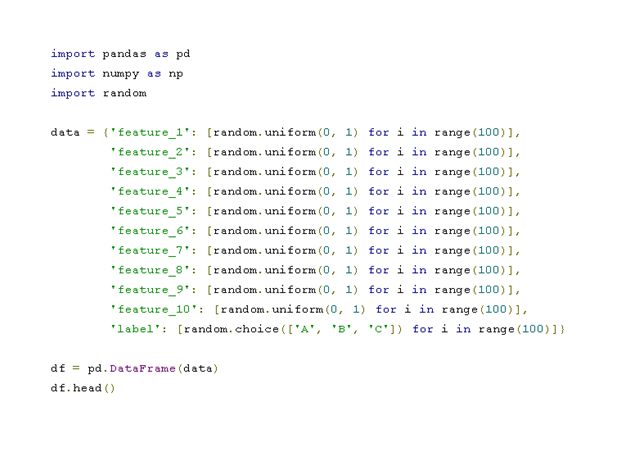

In [17]:
# Type Code Here 
import pandas as pd
import numpy as np
import random

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.519502,0.022343,0.277830,0.935653,0.760320,0.990636,0.350187,0.710201,0.081121,0.881251,A
1,0.694126,0.776027,0.648741,0.647159,0.949988,0.414451,0.402709,0.983641,0.890385,0.125834,C
2,0.600710,0.773171,0.912702,0.607041,0.880082,0.657998,0.111401,0.193049,0.017092,0.056602,A
3,0.455718,0.700577,0.124148,0.702584,0.311365,0.427737,0.698400,0.493210,0.617511,0.090806,C
4,0.441457,0.405729,0.680391,0.450685,0.251324,0.483891,0.668055,0.561354,0.361322,0.196636,C


2. Memisahkan variabel x dan variabel y 

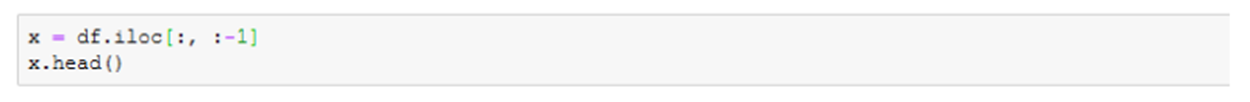



In [18]:
# Type Code Here
x = df.iloc[:, :-1]
x.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.519502,0.022343,0.277830,0.935653,0.760320,0.990636,0.350187,0.710201,0.081121,0.881251
1,0.694126,0.776027,0.648741,0.647159,0.949988,0.414451,0.402709,0.983641,0.890385,0.125834
2,0.600710,0.773171,0.912702,0.607041,0.880082,0.657998,0.111401,0.193049,0.017092,0.056602
3,0.455718,0.700577,0.124148,0.702584,0.311365,0.427737,0.698400,0.493210,0.617511,0.090806
4,0.441457,0.405729,0.680391,0.450685,0.251324,0.483891,0.668055,0.561354,0.361322,0.196636


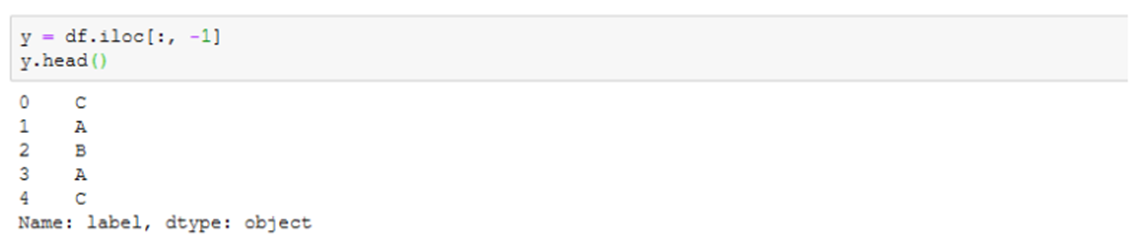

In [19]:
# type code here
y = df.iloc[:, -1]
y.head()


0    A
1    C
2    A
3    C
4    C
Name: label, dtype: object

3. Reduksi Dimensi dengan menggunakan PCA

    Import Library untuk melakukan dimensi reduksi dengan model PCA

    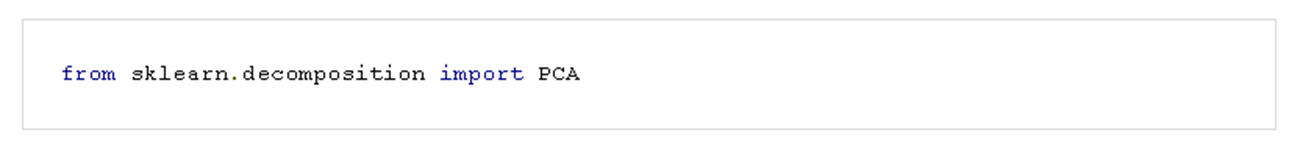

In [20]:
from sklearn.decomposition import PCA

Membuat Class PCA dengan memberikan parameter n_components yang mendefinisikan jumlah komponen atau kolom baru yang diinginkan

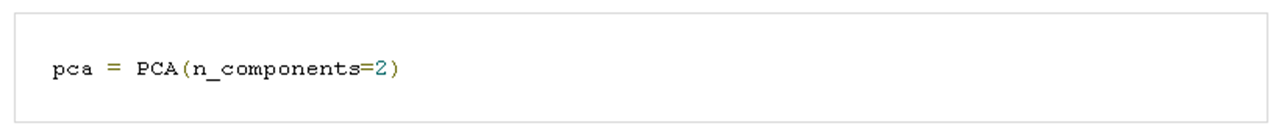

In [21]:
# type code here
pca = PCA(n_components=2)


Setelah membuat class, kita lakukan fit_transform pada data fitur. Jadi nantinya 10 kolom fitur di atas akan di proses menggunakan teknik PCA sehingga akan mengeluarkan 2 kolom baru hasil reduksi

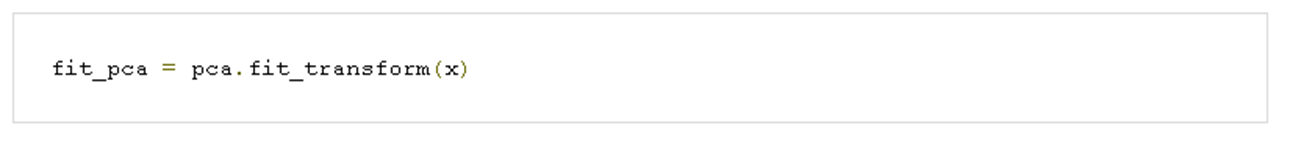

In [22]:
# Type Code Here
fit_pca = pca.fit_transform(x)

Selanjutnya membuat dataframe baru hasil fit transform tersebut

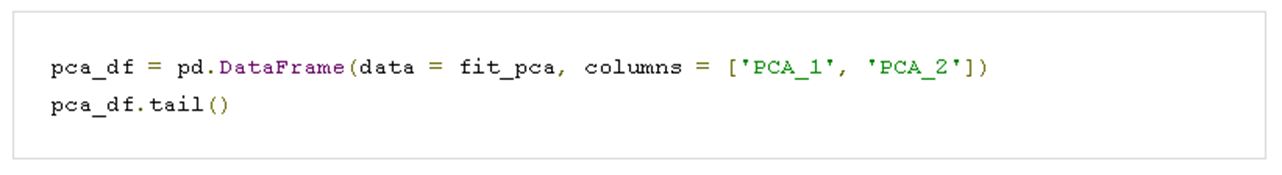

In [23]:
# Type Code Here
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()


,PCA_1,PCA_2
95,-0.096358,0.230760
96,-0.164749,-0.298648
97,-0.435756,0.161181
98,-0.346970,-0.442609
99,0.293567,0.202166


Berikut output hasil dari reduksi fitur-fitur sudah menjadi hanya 2 fitur

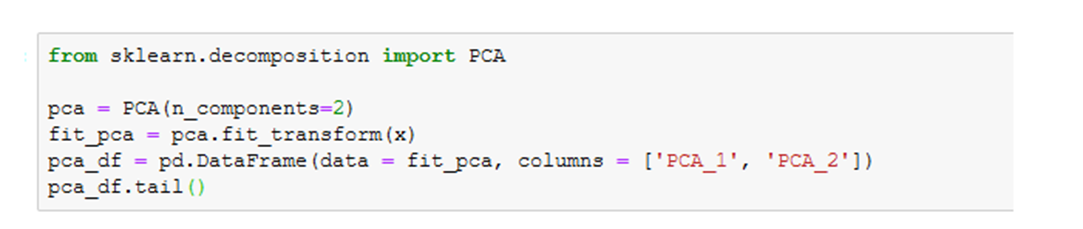

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit_pca = pca.fit_transform(x)
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
95,-0.096358,0.230760
96,-0.164749,-0.298648
97,-0.435756,0.161181
98,-0.346970,-0.442609
99,0.293567,0.202166


4. Reduksi Dimensi Menggunakan LDA

    Import library  Linier Discriminant Analysis (LDA)
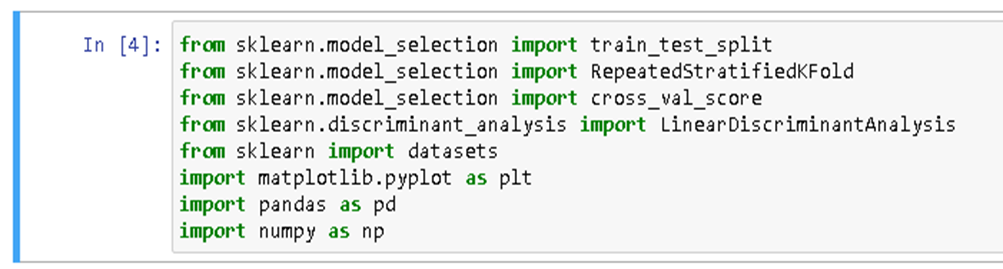

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Convert dataset ke model pandas dataFrame

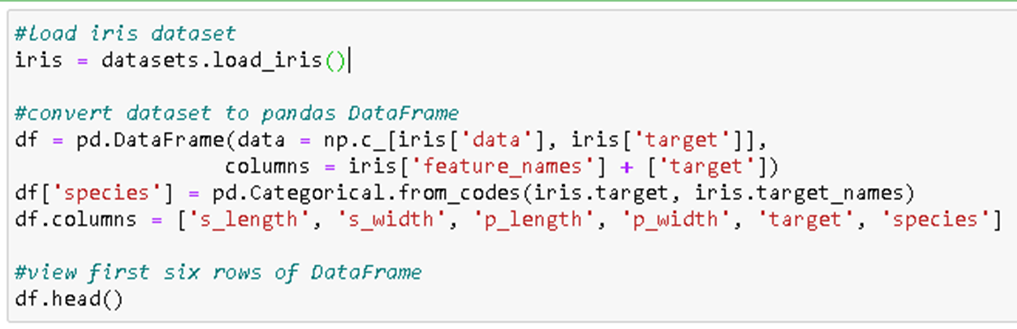

In [26]:
iris = datasets.load_iris()

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


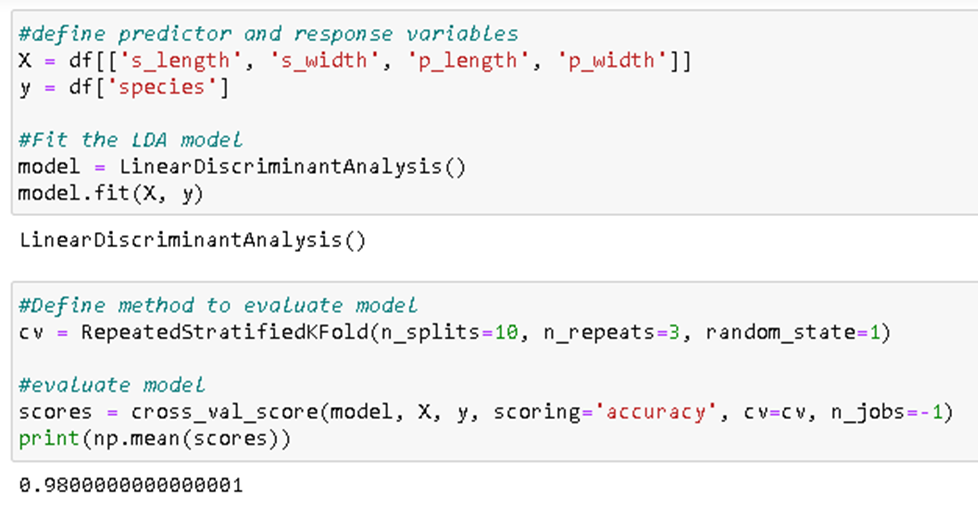

In [27]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [28]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


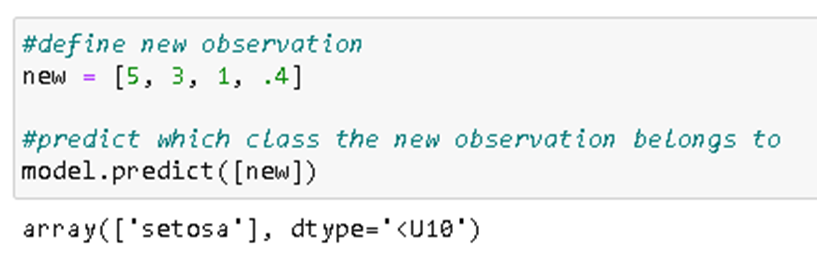

In [29]:
new = [5, 3, 1, 4]

model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array(['virginica'], dtype='<U10')

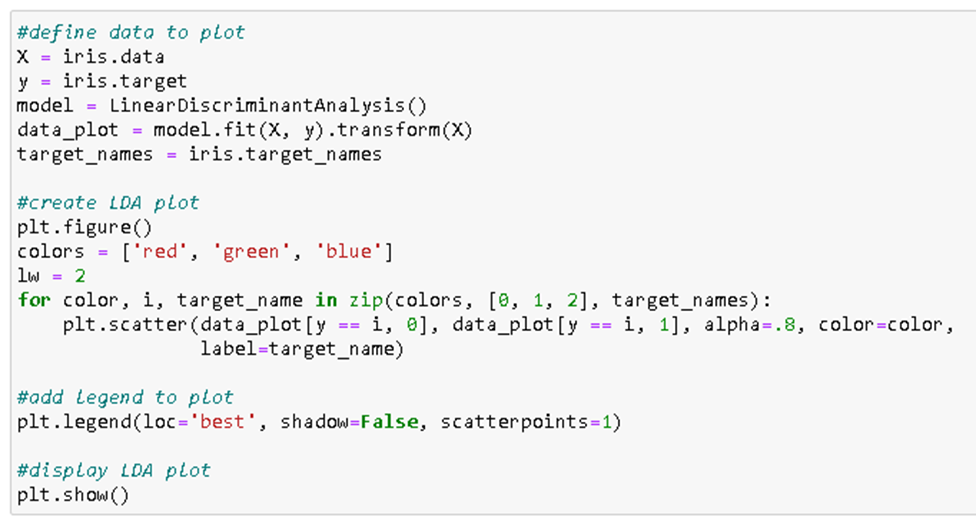

<function matplotlib.pyplot.show>

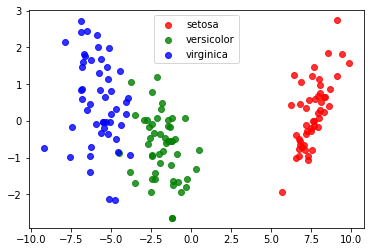

In [30]:
X = iris.data
y= iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show


**TUGAS KELOMPOK**

LATIHAN 1: 
Membuat model data reduction dengan menggunakan PCA (Principle Componen Analysis), dengan ketentuan sebagai berikut:
1. Buatlah dataFrame dengan jumlah fiture 15 
2. Generate dataFrame dengan bilangan float secara random antara 0 dan 1, serta buat n_component berjumlah 2.
3. Membuat Label A, B, C dan D (masing-masing jumlah 150 data), kemudian lanjutkan proses reduksi data model PCA sampai dengan visualisasi data dalam bentuk plot


LATIHAN 2: Membuat model data reduction dengan menggunakan LDA (Linear Discriminant Analysis) dengan ketentuan sebagai berikut;


1.   Menggunakan data dari hasil pengukuran bunga iris, silahkan download di sini: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
2.   Tampilkan dataframe untuk variabel x dan y (data tabular). kemudian lanjutkan proses reduksi data model LDA sampai dengan visualisasi data dalam bentuk plot.





**Jawaban Latihan 1**

In [38]:
# code latihan 1 (PCA) 
import pandas as pd
import numpy as np
import random

data = {'feature_1': [random.uniform(0, 1) for i in range(150)],
        'feature_2': [random.uniform(0, 1) for i in range(150)],
        'feature_3': [random.uniform(0, 1) for i in range(150)],
        'feature_4': [random.uniform(0, 1) for i in range(150)],
        'feature_5': [random.uniform(0, 1) for i in range(150)],
        'feature_6': [random.uniform(0, 1) for i in range(150)],
        'feature_7': [random.uniform(0, 1) for i in range(150)],
        'feature_8': [random.uniform(0, 1) for i in range(150)],
        'feature_9': [random.uniform(0, 1) for i in range(150)],
        'feature_10': [random.uniform(0, 1) for i in range(150)],
        'feature_11': [random.uniform(0, 1) for i in range(150)],
        'feature_12': [random.uniform(0, 1) for i in range(150)],
        'feature_13': [random.uniform(0, 1) for i in range(150)],
        'feature_14': [random.uniform(0, 1) for i in range(150)],
        'feature_15': [random.uniform(0, 1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C', 'D']) for i in range(150)]}

df = pd.DataFrame(data)
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.279844,0.907303,0.066908,0.277415,0.770189,0.887106,0.903440,0.038841,0.412536,0.034371,0.027318,0.173538,0.270377,0.466515,0.256604,B
1,0.271041,0.480868,0.525667,0.198108,0.163195,0.105736,0.679268,0.491009,0.486781,0.194856,0.708446,0.332248,0.213064,0.039836,0.690516,A
2,0.863445,0.661075,0.889643,0.116297,0.279849,0.676050,0.567844,0.723326,0.031258,0.488626,0.075661,0.213423,0.653399,0.890354,0.549369,D
3,0.663048,0.540809,0.837449,0.888499,0.294168,0.234697,0.160099,0.866418,0.716372,0.874601,0.168246,0.490404,0.166491,0.448628,0.341807,B
4,0.913591,0.448619,0.739646,0.297069,0.393382,0.104854,0.654422,0.619492,0.797859,0.424529,0.565470,0.438902,0.736048,0.023764,0.940167,C


In [39]:
x = df.iloc[:, :-1]
x.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.279844,0.907303,0.066908,0.277415,0.770189,0.887106,0.903440,0.038841,0.412536,0.034371,0.027318,0.173538,0.270377,0.466515,0.256604
1,0.271041,0.480868,0.525667,0.198108,0.163195,0.105736,0.679268,0.491009,0.486781,0.194856,0.708446,0.332248,0.213064,0.039836,0.690516
2,0.863445,0.661075,0.889643,0.116297,0.279849,0.676050,0.567844,0.723326,0.031258,0.488626,0.075661,0.213423,0.653399,0.890354,0.549369
3,0.663048,0.540809,0.837449,0.888499,0.294168,0.234697,0.160099,0.866418,0.716372,0.874601,0.168246,0.490404,0.166491,0.448628,0.341807
4,0.913591,0.448619,0.739646,0.297069,0.393382,0.104854,0.654422,0.619492,0.797859,0.424529,0.565470,0.438902,0.736048,0.023764,0.940167


In [40]:
y = df.iloc[:, -1]
y.head()

0    B
1    A
2    D
3    B
4    C
Name: label, dtype: object

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [43]:
fit_pca = pca.fit_transform(x)

In [44]:
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
145,0.173042,-0.517359
146,-0.067804,-0.743948
147,0.047348,0.252008
148,0.242015,-0.523638
149,0.161153,0.027644


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit_pca = pca.fit_transform(x)
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
145,0.173042,-0.517359
146,-0.067804,-0.743948
147,0.047348,0.252008
148,0.242015,-0.523638
149,0.161153,0.027644


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
iris = datasets.load_iris()

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

In [54]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.26


In [55]:
new = [5, 3, 1, 4]

model.predict([new])

array([2])

<function matplotlib.pyplot.show>

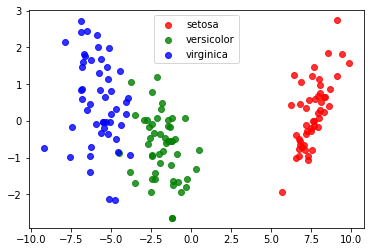

In [56]:
X = iris.data
y= iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show

**Jawaban Latihan 2**

In [61]:
# code latihan 2 (LDA)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
dataku = pd.DataFrame(iris.data)
dataku.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
X = np.array(iris.data)
print (X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [65]:
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [69]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=2)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9777777777777779


In [67]:
new = [5, 3, 1, 4]

model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array(['virginica'], dtype='<U10')

<function matplotlib.pyplot.show>

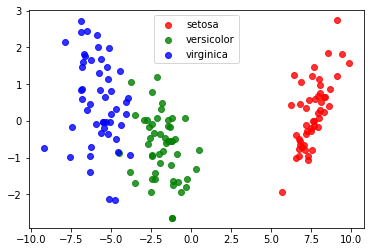

In [70]:
X = iris.data
y= iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
              label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show